In [1]:
%pip install -r requirements.txt 

Note: you may need to restart the kernel to use updated packages.


In [11]:
st_petersburg_incart_12lead_arrhythmia_database_path = r'data/china-12lead-ecg-challenge-database'
ptbxl_electrocardiography_database_path = r'data/ptbxl_electrocardiography_database'
ptb_diagnostic_ecg_database_path = r'data/ptb_diagnostic_ecg_database'
china_physiological_signal_challenge_in_2018_path = r'data/china_physiological_signal_challenge_2018'
china_12lead_ecg_challenge_database_path = r'data/china_12lead_ecg_challenge_database'
physionet_snomed_mappings_path = r'data/physionet_snomed_mappings'
physionet_challenge_models_path = r'datas/physionet_challenge_models'
georgia_12lead_ecg_challenge_database_path = r'data/georgia_12lead_ecg_challenge_database'
physionet_challenge_utility_script_path = r'utils/physionet_challenge_utility_script_patched_v2.py'

In [24]:
import sys
import os

# Add the directory to sys.path
sys.path.append(os.path.dirname(physionet_challenge_utility_script_path))

# Optionally set the working directory (only if needed)
os.chdir(r"C:/Users/nares/Documents/cvd-early-detection-ecg-uhull")

# Check the current working directory
print("Current directory:", os.getcwd())

Current directory: C:\Users\nares\Documents\cvd-early-detection-ecg-uhull


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ecg_plot

import tensorflow as tf
import keras

from keras.utils import plot_model
from keras.preprocessing.sequence import pad_sequences

In [26]:
%load_ext autoreload
%autoreload
%reload_ext autoreload

import physionet_challenge_utility_script_patched_v2 as pc

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


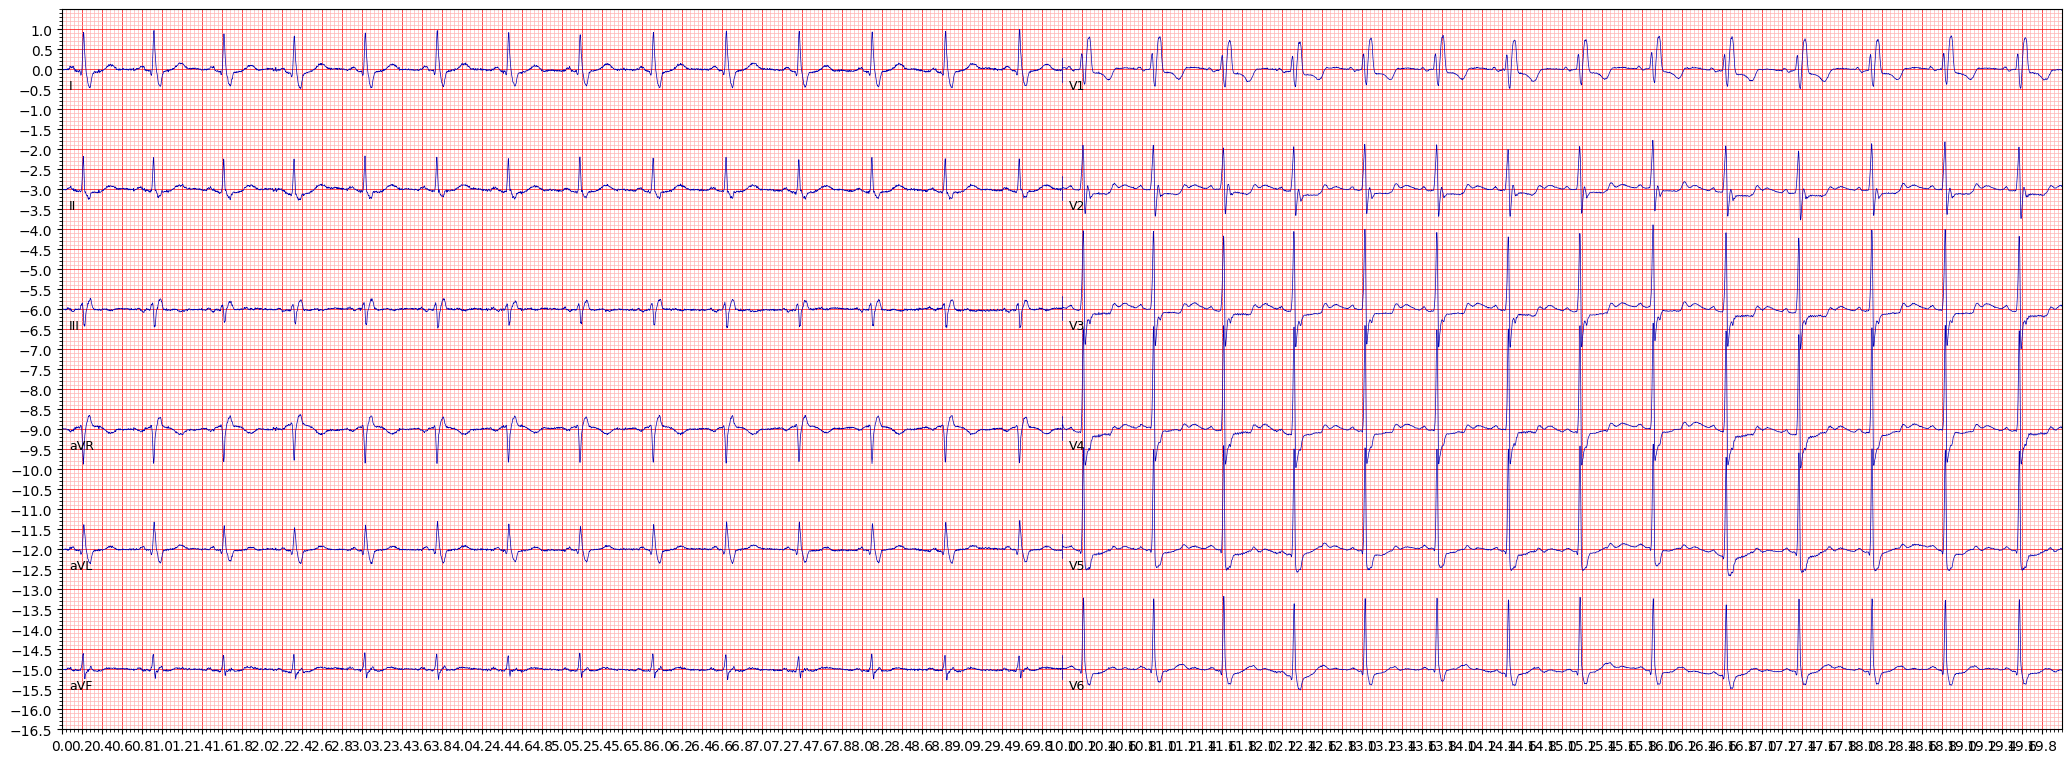

In [27]:
def plot_ecg(path):
    ecg_data = pc.load_challenge_data(path)
    ecg_plot.plot(ecg_data[0]/1000, sample_rate=500, title='')
    ecg_plot.show()

plot_ecg('data/china-12lead-ecg-challenge-database/Training_2/Q0948.mat') 

In [28]:
ecg_data = pc.load_challenge_data("data/china-12lead-ecg-challenge-database/Training_2/Q0002.mat")
ecg_data[0].shape

(12, 7500)

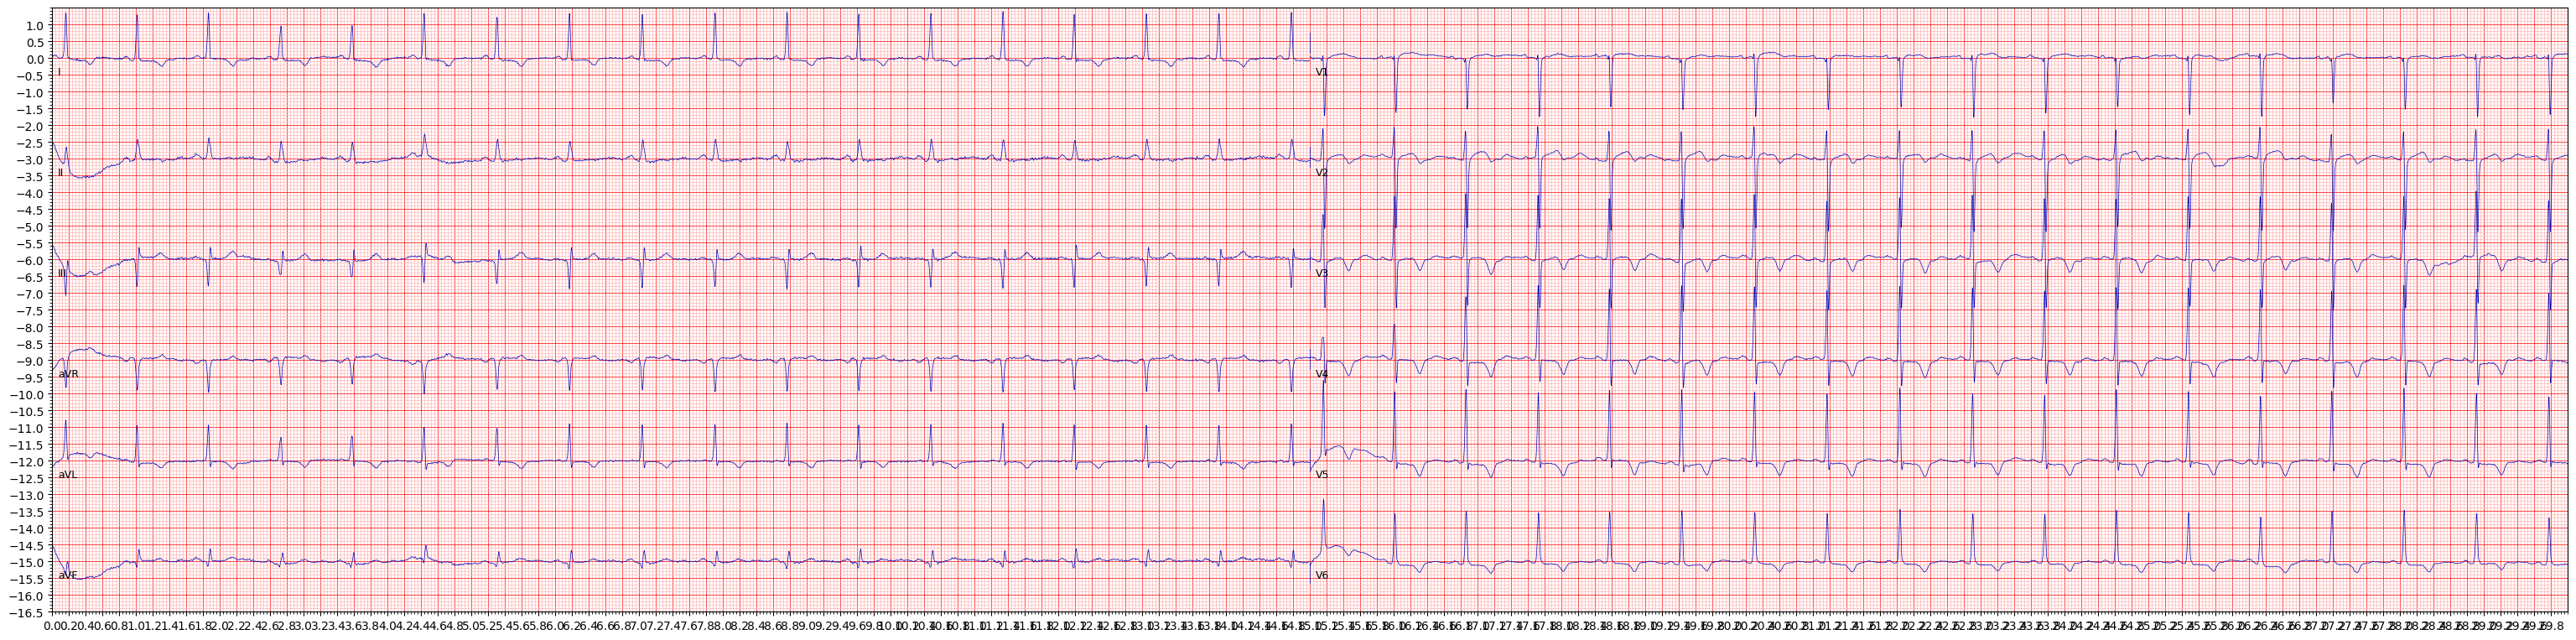

In [29]:
plot_ecg("data/china-12lead-ecg-challenge-database/Training_2/Q0002.mat")

In [ ]:
gender, age, labels, ecg_filenames = pc.import_key_data("data")
ecg_filenames = np.asarray(ecg_filenames)

In [ ]:
pc.get_signal_lengths("datasets", "Distribution of signal lengths of the ECGs")

In [ ]:
age, gender = pc.import_gender_and_age(age, gender)

In [ ]:
SNOMED_scored = pd.read_csv("data/physionet-snomed-mappings/SNOMED_mappings_scored.csv", sep=";")
SNOMED_unscored = pd.read_csv("data/physionet-snomed-mappings/SNOMED_mappings_unscored.csv", sep=";")

df_labels = pc.make_undefined_class(labels,SNOMED_unscored)